In [1]:
import pandas as pd
import numpy as np
GBQ_PROJECT_ID = '620265099307'

q1 = '''-- GBG data
SELECT 
  *
FROM ebmdatalab.measures.practice_data_ghost_generic_measure p
'''
q2 = '''-- dispensing data
SELECT 
  *
FROM ebmdatalab.bsa.dispensing_practices_nov_2018
'''

q3 = '''-- dispensing data
SELECT 
  *
FROM ebmdatalab.bsa.prescriptions_dispensed_by_practices_jul_2018 d
'''

gbg = pd.io.gbq.read_gbq(q1, GBQ_PROJECT_ID, dialect='standard',verbose=True).fillna(0)

gbg.head()

Requesting query... ok.
Job ID: 5af053a6-2b03-423f-8641-ece52cb46200
Query running...
Query done.
Cache hit.

Retrieving results...
Got 499651 rows.

Total time taken 75.79 s.
Finished at 2019-02-05 12:32:15.


,numerator,denominator,practice_id,pct_id,stp_id,regional_team_id,month,calc_value,percentile
0,328.0320,33419.97,A81001,00K,E54000049,Y54,2017-07-01,0.009815,0.969286
1,469.7118,31047.14,A81001,00K,E54000049,Y54,2018-08-01,0.015129,0.974087
2,5.2376,31911.28,A81001,00K,E54000049,Y54,2013-12-01,0.000164,0.770697
3,335.3498,29682.78,A81001,00K,E54000049,Y54,2018-05-01,0.011298,0.955224
4,147.8680,32246.31,A81001,00K,E54000049,Y54,2015-01-01,0.004586,0.974005


In [2]:
disp = pd.io.gbq.read_gbq(q2, GBQ_PROJECT_ID, dialect='standard',verbose=True).fillna(0)
d2 = pd.io.gbq.read_gbq(q3, GBQ_PROJECT_ID, dialect='standard',verbose=True).fillna(0)

disp.head()

Requesting query... ok.
Job ID: 85b35130-c4de-4068-b18c-5284233b2855
Query running...
Query done.
Cache hit.

Retrieving results...
Got 6997 rows.

Total time taken 3.36 s.
Finished at 2019-02-05 12:32:23.
Requesting query... ok.
Job ID: e36deaa5-acaa-437c-b31a-807525c3dd9c
Query running...
Query done.
Cache hit.

Retrieving results...
Got 6022 rows.

Total time taken 2.05 s.
Finished at 2019-02-05 12:32:29.


,ccg,ccg_code,name_address,postcode,practice_code,gp_count,dispensing_patients,prescribing_patients,total_patients
0,DARLINGTON CCG,00C00,"ST GEORGE'S M/P, YARM RD, MIDDLETON ST. GEORGE...",DL2 1BY,A83070,0,772,4753,5525
1,DARLINGTON CCG,00C00,"THE SURGERY, ROCKLIFFE COURT, HURWORTH PLACE, ...",DL2 2DS,A83048,0,2046,3572,5618
2,DARLINGTON CCG,00C00,"BLACKETTS MED PRACTICE, 63-65 BONDGATE, DARLIN...",DL3 7JR,A83034,0,0,10140,10140
3,DARLINGTON CCG,00C00,"CARMEL MEDICAL PRACTICE, NUNNERY LANE, DARLING...",DL3 8SQ,A83031,0,0,10306,10306
4,DARLINGTON CCG,00C00,"CLIFTON COURT MED PRACT, VICTORIA ROAD, DARLIN...",DL1 5JN,A83040,0,0,12005,12005


In [3]:
gbg["month"] = pd.to_datetime(gbg["month"])

disp["practice_code"] = disp.practice_code.str.strip()  # strip blank spaces
d2["org"] = d2.org.str.strip() 

disp.head()

,ccg,ccg_code,name_address,postcode,practice_code,gp_count,dispensing_patients,prescribing_patients,total_patients
0,DARLINGTON CCG,00C00,"ST GEORGE'S M/P, YARM RD, MIDDLETON ST. GEORGE...",DL2 1BY,A83070,0,772,4753,5525
1,DARLINGTON CCG,00C00,"THE SURGERY, ROCKLIFFE COURT, HURWORTH PLACE, ...",DL2 2DS,A83048,0,2046,3572,5618
2,DARLINGTON CCG,00C00,"BLACKETTS MED PRACTICE, 63-65 BONDGATE, DARLIN...",DL3 7JR,A83034,0,0,10140,10140
3,DARLINGTON CCG,00C00,"CARMEL MEDICAL PRACTICE, NUNNERY LANE, DARLING...",DL3 8SQ,A83031,0,0,10306,10306
4,DARLINGTON CCG,00C00,"CLIFTON COURT MED PRACT, VICTORIA ROAD, DARLIN...",DL1 5JN,A83040,0,0,12005,12005


In [4]:
gbg1 = gbg.merge(disp[["practice_code","dispensing_patients","total_patients"]],left_on="practice_id", right_on="practice_code", how="left")
gbg1 = gbg1.drop("practice_code", axis=1)
gbg1["disp_prop"] = gbg1["dispensing_patients"]/gbg1["total_patients"].fillna(0)
gbg1["disp"] =0
gbg1.loc[gbg1["disp_prop"]>0,"disp"] = 1
gbg1.head()

,numerator,denominator,practice_id,pct_id,stp_id,regional_team_id,month,calc_value,percentile,dispensing_patients,total_patients,disp_prop,disp
0,328.0320,33419.97,A81001,00K,E54000049,Y54,2017-07-01,0.009815,0.969286,0.0,4083.0,0.0,0
1,469.7118,31047.14,A81001,00K,E54000049,Y54,2018-08-01,0.015129,0.974087,0.0,4083.0,0.0,0
2,5.2376,31911.28,A81001,00K,E54000049,Y54,2013-12-01,0.000164,0.770697,0.0,4083.0,0.0,0
3,335.3498,29682.78,A81001,00K,E54000049,Y54,2018-05-01,0.011298,0.955224,0.0,4083.0,0.0,0
4,147.8680,32246.31,A81001,00K,E54000049,Y54,2015-01-01,0.004586,0.974005,0.0,4083.0,0.0,0


In [5]:
# filter to latest 12 months
gbg2 = gbg1.loc[(gbg1.month >= "2017-12-01") & (gbg1.month < "2018-11-01")].groupby(["practice_id","pct_id","disp"])[["numerator","denominator"]].sum()
gbg2.head()

,,,numerator,denominator
practice_id,pct_id,disp,,
A81001,00K,0,4714.1636,314440.51
A81002,00K,0,6250.3744,1686477.19
A81003,00K,0,0.0000,0.00
A81004,00M,0,2722.0386,838850.73
A81005,00M,0,2416.4667,668644.16


In [6]:
#check if any practices have "dispensing patients" but dispensed no items in Jul 2018
gbg3 = gbg2.reset_index().merge(d2[["org","items"]],left_on="practice_id", right_on="org", how="left")

gbg3.loc[(gbg3["disp"]==1) & (gbg3["items"]==0)]

,practice_id,pct_id,disp,numerator,denominator,org,items


In [7]:
# calculate measure values

gbg4 = gbg2.copy().reset_index()
gbg4["calc_value"] = (gbg4.numerator/gbg4.denominator).fillna(0)

gbg4.head()

,practice_id,pct_id,disp,numerator,denominator,calc_value
0,A81001,00K,0,4714.1636,314440.51,0.014992
1,A81002,00K,0,6250.3744,1686477.19,0.003706
2,A81003,00K,0,0.0000,0.00,0.000000
3,A81004,00M,0,2722.0386,838850.73,0.003245
4,A81005,00M,0,2416.4667,668644.16,0.003614


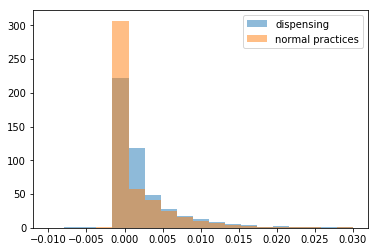

In [8]:
from matplotlib import pyplot

dfp = gbg4.copy().loc[gbg4["denominator"]>0] # exclude those with no generic spend

x = dfp.loc[dfp["disp"]==1]["calc_value"]
y = dfp.loc[dfp["disp"]==0]["calc_value"]

bins = np.linspace(-0.01, 0.03, 20)

pyplot.hist(x, bins, alpha=0.5, label='dispensing', density=True)
pyplot.hist(y, bins, alpha=0.5, label='normal practices', density=True)
pyplot.legend(loc='upper right')
pyplot.show()

### Summarise measure values for dispensing vs non-dispensing practices

In [9]:
dfp.groupby("disp")["calc_value"].describe().transpose()

disp,0,1
count,6381.000000,978.000000
mean,0.002153,0.002776
std,0.006560,0.005473
min,-0.197870,-0.007102
25%,-0.000030,0.000125
50%,0.000063,0.000652
75%,0.002304,0.003100
max,0.184687,0.062468


### Look at practices with highest GBG excess costs

In [10]:
dfp.copy().loc[dfp["calc_value"]>0.062].sort_values(by="calc_value")

,practice_id,pct_id,disp,numerator,denominator,calc_value
5574,L84027,11M,1,29693.7161,475344.87,0.062468
357,A87005,99C,0,69645.9815,1092551.25,0.063746
2510,E85700,07Y,0,7716.5890,116653.46,0.066150
1905,D82071,06W,0,98062.7614,1304298.10,0.075184
956,B86633,15F,0,14056.5619,167861.14,0.083739
6428,M88041,05L,0,18515.0817,213765.53,0.086614
722,B83034,02W,0,68966.6680,450301.11,0.153157
2607,E87026,08Y,0,54547.8752,295353.64,0.184687
